In [9]:
library('igraph')
library('Matrix')
library('pracma')

# Question 1

In [12]:
set.seed(1)

In [13]:
g1 <- random.graph.game(1000, p = 0.01, directed = F)

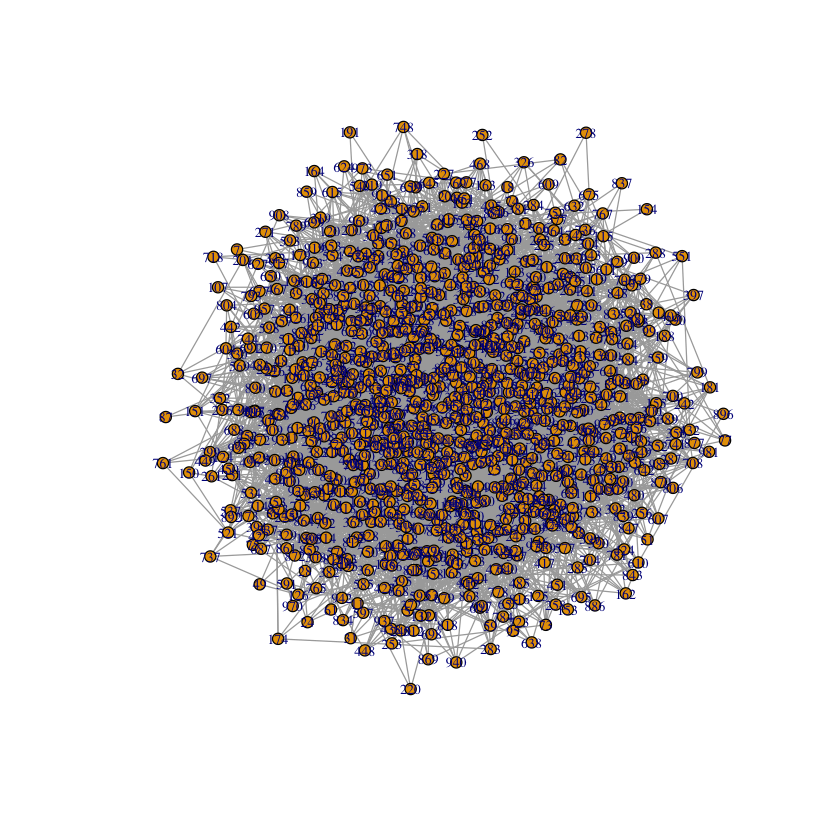

In [14]:
plot(g1,vertex.size=4, vertex.label.cex=0.7)